In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from imblearn.under_sampling import RandomUnderSampler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, RocCurveDisplay, auc
from catboost import CatBoostClassifier
import lightgbm as lgb
from mlxtend.feature_selection import SequentialFeatureSelector

# Подготовка данных

In [2]:
dataset_path = 'data/creditcard.csv'
dataset = pd.read_csv(dataset_path, sep='[,]', engine='python')

In [3]:
df = dataset.copy()
display(df)

,"""Time""","""V1""","""V2""","""V3""","""V4""","""V5""","""V6""","""V7""","""V8""","""V9""",...,"""V21""","""V22""","""V23""","""V24""","""V25""","""V26""","""V27""","""V28""","""Amount""","""Class"""
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,"""0"""
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,"""0"""
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,"""0"""
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,"""0"""
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,"""0"""
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,"""0"""
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,"""0"""
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,"""0"""
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,"""0"""


In [4]:
df.columns = df.columns.str.replace(r'\W', '', regex=True)
df.loc[:, 'Class'] = df.loc[:, 'Class'].str.replace(r'\W', '', regex=True)
df = df.astype({'Class': 'int'})
display(df)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


# Балансировка датасета
Разделим данные

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class', axis=1), df['Class'], test_size=0.25, random_state=0)

Визуализируем несбалансированный датасет

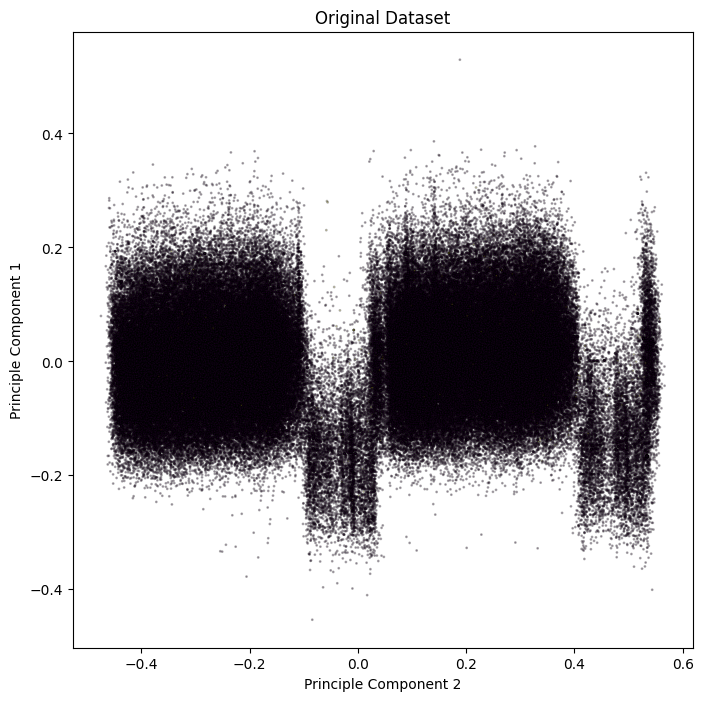

In [6]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

pca = PCA(n_components=2)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

def plot_data(X, y, ax, title):
    ax.scatter(X[:, 0], X[:, 1], c=y, alpha=0.3, s = 1, edgecolor=(0,0,0,0.5))
    ax.set_ylabel('Principle Component 1')
    ax.set_xlabel('Principle Component 2')
    if title is not None:
        ax.set_title(title)
        
fig,ax = plt.subplots(figsize=(8, 8))
plot_data(X_train_pca, y_train, ax, title='Original Dataset')

Применим Random Undersampling для класса большинства и визуализируем

In [7]:
rus = RandomUnderSampler(random_state=0)
X_train_rus, y_train_rus = rus.fit_resample(X_train_pca, y_train)

In [23]:
# print(np.mean([est.steps[1][1].feature_importances_ for est in rus.estimators_], axis=0))
rus.

AttributeError: 'RandomUnderSampler' object has no attribute 'feature_importances_'

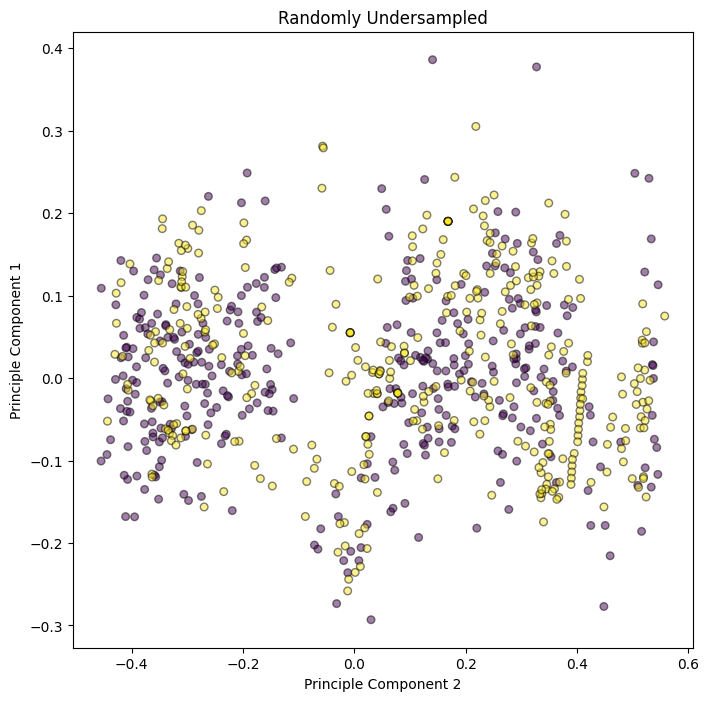

In [8]:
def plot_data(X, y, ax, title):
    ax.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5, s = 30, edgecolor=(0,0,0,0.5))
    ax.set_ylabel('Principle Component 1')
    ax.set_xlabel('Principle Component 2')
    if title is not None:
        ax.set_title(title)
        
fig,ax = plt.subplots(figsize=(8, 8))
plot_data(X_train_rus, y_train_rus, ax, title='Randomly Undersampled')

Проверим ROC_AUC метрику в исходном и Undersampled датасетах

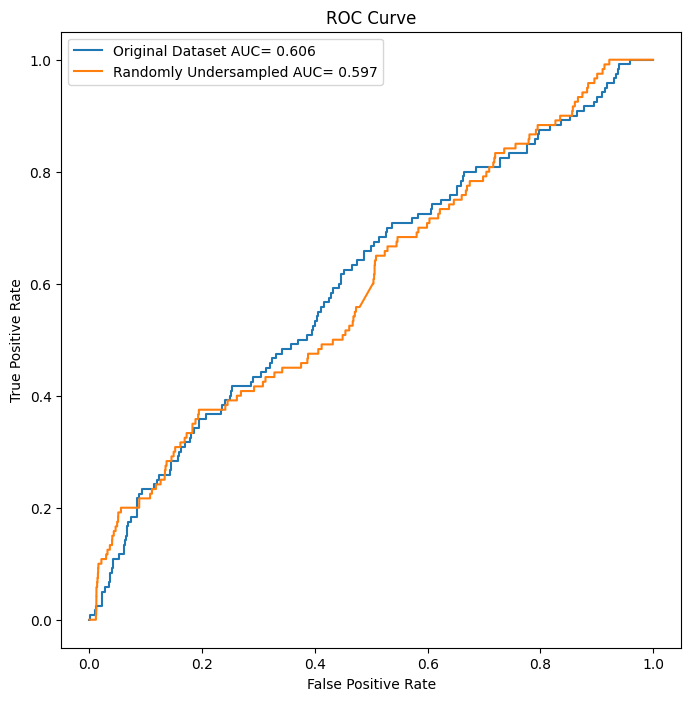

In [9]:
def plot_roc(ax, X_train, y_train, X_test, y_test, title):
    clf = SVC(kernel='linear', probability=True)
    clf.fit(X_train, y_train)
    y_test_pred = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
    auc = roc_auc_score(y_test, y_test_pred)
    ax.plot(fpr, tpr, label=f'{title} AUC={auc: .3f}')
    
    ax.set_title('ROC Curve')
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.legend(loc=0)
    
fig,ax = plt.subplots(1, 1, figsize=(8, 8))
plot_roc(ax, X_train_pca, y_train, X_test_pca, y_test, 'Original Dataset')
plot_roc(ax, X_train_rus, y_train_rus, X_test_pca, y_test, 'Randomly Undersampled')

### X_train_rus, X_test_rus, y_train_pca, y_test представляют Undersampled dataset, нужно оформить их в виде датасета и выявить значимость фичей с помощью одной из моделей обучения библиотеки sklearn (например RandomForestClassifier) и поиска по сетке (GridSearchCV)
### Также хотелось бы изобразить гистограмму по классам в измененном датасете при помощи seaborn.countplot()

In [29]:
sns.countplot()

TypeError: countplot() got multiple values for argument 'data'

# CatBoosting 

In [10]:
X_train, X_test, y_train = X_train_rus, X_test_pca, y_train_rus

In [12]:
# AUC
params = {'iterations': 1000, 'use_best_model': True, 'eval_metric': 'AUC'}
model = CatBoostClassifier(**params)

model.fit(X_train, y_train,
          eval_set=(X_test, y_test),
          verbose=50)

Learning rate set to 0.029457
0:	test: 0.5880221	best: 0.5880221 (0)	total: 3.1ms	remaining: 3.09s
50:	test: 0.6754094	best: 0.6773534 (19)	total: 170ms	remaining: 3.16s
100:	test: 0.6901946	best: 0.6905632 (98)	total: 302ms	remaining: 2.69s
150:	test: 0.6950595	best: 0.6953152 (145)	total: 437ms	remaining: 2.46s
200:	test: 0.6968427	best: 0.6979177 (180)	total: 599ms	remaining: 2.38s
250:	test: 0.6981552	best: 0.6994925 (234)	total: 727ms	remaining: 2.17s
300:	test: 0.6945288	best: 0.6994925 (234)	total: 857ms	remaining: 1.99s
350:	test: 0.6930553	best: 0.6994925 (234)	total: 989ms	remaining: 1.83s
400:	test: 0.6910889	best: 0.6994925 (234)	total: 1.13s	remaining: 1.69s
450:	test: 0.6877269	best: 0.6994925 (234)	total: 1.27s	remaining: 1.55s
500:	test: 0.6842866	best: 0.6994925 (234)	total: 1.41s	remaining: 1.4s
550:	test: 0.6823644	best: 0.6994925 (234)	total: 1.55s	remaining: 1.26s
600:	test: 0.6832746	best: 0.6994925 (234)	total: 1.69s	remaining: 1.12s
650:	test: 0.6828231	best: 0.

In [13]:
# Recall
params = {'iterations': 1000, 'use_best_model': True, 'eval_metric': 'Recall'}
model = CatBoostClassifier(**params)

model.fit(X_train, y_train,
          eval_set=(X_test, y_test),
          verbose=50)

Learning rate set to 0.029457
0:	learn: 0.6935484	test: 0.6333333	best: 0.6333333 (0)	total: 1.72ms	remaining: 1.72s
50:	learn: 0.6666667	test: 0.5583333	best: 0.7000000 (1)	total: 74.5ms	remaining: 1.39s
100:	learn: 0.6827957	test: 0.5416667	best: 0.7000000 (1)	total: 138ms	remaining: 1.23s
150:	learn: 0.7150538	test: 0.5500000	best: 0.7000000 (1)	total: 204ms	remaining: 1.15s
200:	learn: 0.7419355	test: 0.5333333	best: 0.7000000 (1)	total: 271ms	remaining: 1.08s
250:	learn: 0.7580645	test: 0.5333333	best: 0.7000000 (1)	total: 340ms	remaining: 1.01s
300:	learn: 0.7983871	test: 0.5416667	best: 0.7000000 (1)	total: 415ms	remaining: 963ms
350:	learn: 0.8091398	test: 0.5583333	best: 0.7000000 (1)	total: 486ms	remaining: 898ms
400:	learn: 0.8252688	test: 0.5500000	best: 0.7000000 (1)	total: 549ms	remaining: 820ms
450:	learn: 0.8360215	test: 0.5500000	best: 0.7000000 (1)	total: 613ms	remaining: 746ms
500:	learn: 0.8413978	test: 0.5333333	best: 0.7000000 (1)	total: 678ms	remaining: 675ms
550

In [14]:
# Precision
params = {'iterations': 1000, 'use_best_model': True, 'eval_metric': 'Precision'}
model = CatBoostClassifier(**params)

model.fit(X_train, y_train,
          eval_set=(X_test, y_test),
          verbose=50)

Learning rate set to 0.029457
0:	learn: 0.6187050	test: 0.0023274	best: 0.0023274 (0)	total: 1.7ms	remaining: 1.69s
50:	learn: 0.7425150	test: 0.0031995	best: 0.0033980 (29)	total: 91ms	remaining: 1.69s
100:	learn: 0.7492625	test: 0.0030464	best: 0.0033980 (29)	total: 169ms	remaining: 1.51s
150:	learn: 0.7710145	test: 0.0030447	best: 0.0033980 (29)	total: 234ms	remaining: 1.31s
200:	learn: 0.8023256	test: 0.0029393	best: 0.0033980 (29)	total: 301ms	remaining: 1.2s
250:	learn: 0.8173913	test: 0.0028417	best: 0.0033980 (29)	total: 364ms	remaining: 1.09s
300:	learn: 0.8296089	test: 0.0028029	best: 0.0033980 (29)	total: 440ms	remaining: 1.02s
350:	learn: 0.8575499	test: 0.0028863	best: 0.0033980 (29)	total: 508ms	remaining: 939ms
400:	learn: 0.8647887	test: 0.0028238	best: 0.0033980 (29)	total: 570ms	remaining: 852ms
450:	learn: 0.8810198	test: 0.0028129	best: 0.0033980 (29)	total: 635ms	remaining: 773ms
500:	learn: 0.8968481	test: 0.0027462	best: 0.0033980 (29)	total: 702ms	remaining: 699

In [15]:
# Accuracy
params = {'iterations': 1000, 'use_best_model': True, 'eval_metric': 'Accuracy'}
model = CatBoostClassifier(**params)

model.fit(X_train, y_train,
          eval_set=(X_test, y_test),
          verbose=50)

Learning rate set to 0.029457
0:	learn: 0.6330645	test: 0.5418387	best: 0.5418387 (0)	total: 1.67ms	remaining: 1.67s
50:	learn: 0.7177419	test: 0.7060897	best: 0.7232662 (27)	total: 77.5ms	remaining: 1.44s
100:	learn: 0.7271505	test: 0.7004719	best: 0.7232662 (27)	total: 148ms	remaining: 1.31s
150:	learn: 0.7513441	test: 0.6957248	best: 0.7232662 (27)	total: 212ms	remaining: 1.19s
200:	learn: 0.7795699	test: 0.6943063	best: 0.7232662 (27)	total: 281ms	remaining: 1.12s
250:	learn: 0.7943548	test: 0.6838010	best: 0.7232662 (27)	total: 343ms	remaining: 1.02s
300:	learn: 0.8172043	test: 0.6744473	best: 0.7232662 (27)	total: 418ms	remaining: 972ms
350:	learn: 0.8373656	test: 0.6741805	best: 0.7232662 (27)	total: 489ms	remaining: 904ms
400:	learn: 0.8481183	test: 0.6719053	best: 0.7232662 (27)	total: 554ms	remaining: 827ms
450:	learn: 0.8615591	test: 0.6706413	best: 0.7232662 (27)	total: 618ms	remaining: 752ms
500:	learn: 0.8723118	test: 0.6728041	best: 0.7232662 (27)	total: 683ms	remaining:

In [16]:
cat_pred = model.predict(X_test)
print(classification_report(y_test, cat_pred))

              precision    recall  f1-score   support

           0       1.00      0.72      0.84     71082
           1       0.00      0.56      0.01       120

    accuracy                           0.72     71202
   macro avg       0.50      0.64      0.42     71202
weighted avg       1.00      0.72      0.84     71202


Построим гистограмму значимости фичей датасета

In [17]:
feature_names = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
                 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22',
                 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
fi = pd.DataFrame({'features': feature_names, 'w': model.feature_importances_})
fi.sort_values('w', inplace=True)
fi.set_index('features')['w'].plot(kind='barh', figsize=(5, 8), grid=True)

ValueError: All arrays must be of the same length

# Прямой отбор фичей

In [19]:
y_pred = model.predict(X_test)
print(y_pred)

[0 0 1 ... 0 0 1]


In [20]:
confusion_matrix(y_test, y_pred)

array([[51431, 19651],
       [   53,    67]], dtype=int64)